# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [48]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [31]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [93]:
item_domain

,item_id,domain_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE
1,871377,MLM-VIDEO_GAMES
2,490232,MLM-SKIRTS
3,1150706,MLM-GRAPHICS_CARDS
4,934912,MLM-NOTEBOOKS
...,...,...
2102272,1099649,MLB-BABY_STROLLERS
2102273,1482187,MLB-KITCHEN_SUPPLIES
2102274,1118904,MLB-SOCKS
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS


## test_dataset.jl.gz

In [78]:
%%time
test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

CPU times: user 1.33 s, sys: 568 ms, total: 1.9 s
Wall time: 1.97 s


### submissions check

In [54]:
pred_10_fn = 'pred_10_interim.pkl'
pred_10_fp = os.path.join(interim_data_dir, pred_10_fn)
pred_10 = pd.read_pickle(pred_10_fp)

pred_10.columns = [str(c) for c in pred_10.columns]

In [55]:
for c in range(10):
    pred_10[str(c) + '_domain'] = pd.merge(pred_10, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred_10[str(c) + '_MLX'] = pred_10[str(c) + '_domain'].str[:3]

In [66]:
pred_10_domains = pred_10.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [72]:
pred_10 = pd.concat([pred_10, pred_10_domains.sum(axis = 1)], axis = 1)

In [82]:
pred_10[pred_10[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,top_score,origin,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
13304,355797.0,1452953.0,518729.0,642713.0,942476.0,547177.0,1918940.0,37718.0,887849.0,518215.0,0.156012,pt,MLB-VEHICLE_ACCESSORIES,MLB,MLB-TOOL_BAGS_AND_BACKPACKS,MLB,MLB-AUTOMOTIVE_SPARE_TIRE_COVERS,MLB,MLB-CAR_ROOF_BOXES,MLB,MLB-SUPPLEMENTS,MLB,MLM-CELLPHONE_COVERS,MLM,MLB-WRENCH_SETS,MLB,MLB-HEELS_AND_WEDGES,MLB,MLB-SMARTWATCHES,MLB,MLB-ELECTRIC_HAND_PLANERS,MLB,9.0
75096,940671.0,2060954.0,653892.0,1428927.0,776983.0,1451776.0,1406614.0,1619910.0,1422185.0,499616.0,0.820902,pt,MLB-FREEZERS,MLB,MLB-GEL_NAIL_KITS,MLB,MLB-NAIL_DUST_COLLECTORS,MLB,MLB-NAIL_DUST_COLLECTORS,MLB,MLB-GEL_NAIL_KITS,MLB,MLB-FREEZERS,MLB,MLB-GEL_NAIL_KITS,MLB,MLB-NAIL_DUST_COLLECTORS,MLB,None,None,MLB-GEL_NAIL_KITS,MLB,9.0
172184,1514141.0,1165844.0,314363.0,1268937.0,1164162.0,1567936.0,1137417.0,91372.0,1748431.0,1602721.0,0.043648,pt,MLB-PANTS,MLB,MLB-DOORS,MLB,MLB-CELLPHONES,MLB,MLB-SPEAKERS,MLB,MLB-SPORT_PROTECTIVE_GEAR_SETS,MLB,MLB-SEAT_BELTS,MLB,MLB-POOL_CHLORINE,MLB,MLB-BABY_SUPPLIES,MLB,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-PANTS,MLB,9.0
3789,1756392.0,225526.0,1747681.0,609484.0,184416.0,2060204.0,2089916.0,1539514.0,869038.0,1151464.0,0.556413,pt,None,None,MLB-PLANTING_KITS,MLB,MLB-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES,MLB,MLB-RETAIL_SPACE_FOR_SALE,MLB,MLB-GAME_CONSOLES,MLB,MLB-MULTIPURPOSE_TARPS,MLB,MLB-MULTIPURPOSE_TARPS,MLB,MLB-CAT_AND_DOG_DRINKERS_AND_FEEDERS,MLB,MLB-CAT_AND_DOG_DRINKERS_AND_FEEDERS,MLB,MLB-GAME_CONSOLES,MLB,9.0
135649,1500657.0,1830427.0,1234249.0,584746.0,1120073.0,556280.0,1514249.0,30138.0,1305457.0,300828.0,0.155132,pt,MLB-CELLPHONES,MLB,MLB-HAIR_EXTENSIONS,MLB,MLB-TABLET_CASES,MLB,MLB-AUTOMOTIVE_IGNITION_KEYS,MLB,MLM-CELLPHONE_COVERS,MLM,MLB-CELLPHONE_ACCESSORIES,MLB,MLB-CELLPHONES,MLB,MLB-GEL_NAIL_KITS,MLB,MLB-CELLPHONES,MLB,MLB-DRESSES,MLB,9.0
7352,513789.0,1196751.0,1588771.0,191078.0,1975370.0,773429.0,1348983.0,1708483.0,722653.0,1085589.0,0.550582,pt,MLB-TV_REPLACEMENT_BACKLIGHT_LED_STRIPS,MLB,MLB-TV_REPLACEMENT_BACKLIGHT_LED_STRIPS,MLB,MLB-AUTOMOTIVE_DOOR_LATCHES,MLB,MLB-MOTORCYCLE_LEVERS,MLB,MLB-WALL_AND_CEILING_LIGHTS,MLB,MLB-CARD_PAYMENT_TERMINALS,MLB,MLM-RADIO_FREQUENCY_MACHINES,MLM,MLB-KITCHEN_CABINETS,MLB,MLB-CELLPHONES,MLB,MLB-PERFUMES,MLB,9.0
103742,1055926.0,2057607.0,858512.0,1641538.0,935618.0,392431.0,416523.0,1174803.0,2089465.0,865784.0,0.573420,pt,MLB-MICRONEEDLE_ROLLERS,MLB,MLB-BICYCLE_ACCESSORIES_AND_SPARE_PARTS,MLB,MLB-CARS_AND_VANS,MLB,None,None,MLB-SUITS,MLB,MLB-MICRONEEDLE_ROLLERS,MLB,MLB-MICRONEEDLE_ROLLERS,MLB,MLB-MICRONEEDLE_ROLLERS,MLB,MLB-SUITS,MLB,MLB-AUTOMOTIVE_BED_COVERS,MLB,9.0
104895,1506583.0,1314639.0,213246.0,1856280.0,1733315.0,599851.0,1929801.0,1091575.0,31947.0,461681.0,0.035965,pt,MLB-CHINESE_MEDICAL_CUPS_SETS,MLB,MLB-CELLPHONES,MLB,MLB-SCOOTERS,MLB,MLB-PANTS,MLB,MLB-WEDDING_BANDS,MLB,MLB-SHIRTS,MLB,MLB-SNEAKERS,MLB,MLM-HEADPHONES,MLM,MLB-SNEAKERS,MLB,MLB-SANDALS_AND_FLIP_FLOPS,MLB,9.0
161140,1933218.0,855657.0,582735.0,260661.0,371159.0,359306.0,496155.0,1204746.0,875856.0,131978.0,0.663901,pt,None,None,MLB-CELLPHONE_COVERS,MLB,MLB-TELEVISIONS,MLB,MLB-CELLPHONES,MLB,MLB-NON_CORRECTIVE_CONTACT_LENSES,MLB,MLB-STOVETOP_POPCORN_POPPERS,MLB,MLB-FLASHLIGHTS,MLB,MLB-HEELS_AND_WEDGES,MLB,MLB-CELLPHONES,MLB,MLB-CELLPHONE_SELFIE_LIGHTS,MLB,9.0
94667,1298793.0,1893809.0,1449919.0,216525.0,917650.0,1933640.0,2077513.0,1837129.0,861084.0,887605.0,0.973890,es,MLM-MALE_UNDERWEAR,MLM,MLM-ANIMAL_AND_PET_PRODUCTS,MLM,MLM-FANS,MLM,MLM-FANS,MLM,MLM-FANS,MLM,MLM-MALE_UNDERWEAR,MLM,MLM-INDUSTRIAL_EXHAUST_FANS,MLM,MLM-SURVEILLANCE_CAMERAS,MLM,MLB-INTEGRATED_CIRCUITS,MLB,MLM-SURVEILLANCE_CAMERAS,MLM,1.0


In [155]:
pred_10.rename(columns = {0: 'MLX_sum'}, inplace = True)

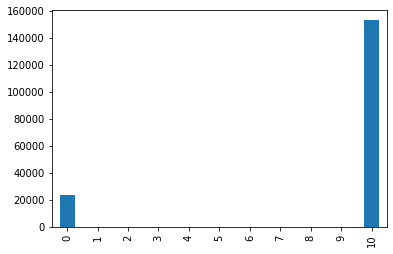

In [164]:
pred_10.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar', logy = False);

In [116]:
pred_10_domains = pred_10.filter(like = 'domain')

In [119]:
pred_10_domains = pred_10_domains.fillna('NONE')

In [121]:
pred_10['unique_domains'] = pred_10_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [132]:
pred_10['len_unique_domains'] = pred_10.unique_domains.str[0].str.len()

In [142]:
pred_10['len_domain_mode_freq'] = pred_10.unique_domains.str[1].apply(max)

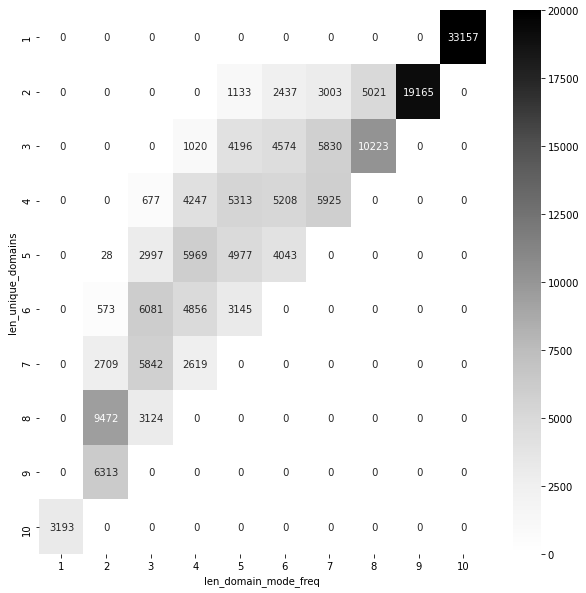

In [152]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred_10.len_unique_domains, columns = pred_10.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');